In [17]:
from PyHessian.pyhessian.hessian import hessian
from PyHessian.density_plot import get_esd_plot
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
# from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
mnist_trainset = datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transforms.ToTensor())
mnist_fashion_trainset = datasets.FashionMNIST(root='./data/fashion_mnist', train=True, download=True, transform=transforms.ToTensor())
cifar_trainset = datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transforms.ToTensor())
# Getting mnist test data
mnist_testset = datasets.MNIST(root='./data/mnist', train=False, download=True, transform=transforms.ToTensor())
mnist_fashion_testset = datasets.FashionMNIST(root='./data/fashion_mnist', train=False, download=True, transform=transforms.ToTensor())
cifar_testset = datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transforms.ToTensor())

torch.manual_seed(42)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_X = mnist_trainset.data
train_y = mnist_trainset.targets
test_X = mnist_testset.data
test_y = mnist_testset.targets

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [6]:
train_X = (torch.tensor(train_X, dtype=torch.float32)/255).to(device)
test_X = (torch.tensor(test_X, dtype=torch.float32)/255).to(device)
train_y = (torch.tensor(train_y, dtype=torch.int64)).to(device)
test_y = (torch.tensor(test_y, dtype=torch.int64)).to(device)

C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_10084\2213468680.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_X = (torch.tensor(train_X, dtype=torch.float32)/255).to(device)
C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_10084\2213468680.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = (torch.tensor(test_X, dtype=torch.float32)/255).to(device)
C:\Users\Rajeev Wankar\AppData\Local\Temp\ipykernel_10084\2213468680.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = (torch.tensor(train_y, dtype=torc

In [7]:
dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(train_X, train_y),
    batch_size=64, shuffle=True)
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
losses = []
test_losses = []
train_losses = []
for epoch in range(10):
    for i, (data, target) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)
        #output_test = model(test_X)
        loss = criterion(output, target)
        # loss_test = criterion(output_test, test_y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 500 == 0:
            output = model(train_X)
            loss_train = criterion(output, train_y)
            output = model(test_X)
            loss_test = criterion(output, test_y)
            print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}, test_loss {loss_test.item()}")
            output_test = model(test_X)
            test_losses.append(loss_test.item())
            train_losses.append(loss_train.item())
    #print(loss.item())

Epoch 0, step 0, train_loss 2.296659231185913, test_loss 2.2838594913482666
Epoch 0, step 500, train_loss 0.22535091638565063, test_loss 0.26206690073013306
Epoch 1, step 0, train_loss 0.13945867121219635, test_loss 0.18931689858436584
Epoch 1, step 500, train_loss 0.04595639929175377, test_loss 0.15355706214904785
Epoch 2, step 0, train_loss 0.1138119027018547, test_loss 0.12238067388534546
Epoch 2, step 500, train_loss 0.1967219114303589, test_loss 0.12465894967317581
Epoch 3, step 0, train_loss 0.16325467824935913, test_loss 0.1082429438829422
Epoch 3, step 500, train_loss 0.032585375010967255, test_loss 0.09641104191541672
Epoch 4, step 0, train_loss 0.021301159635186195, test_loss 0.09529922902584076
Epoch 4, step 500, train_loss 0.06187276542186737, test_loss 0.08758503943681717
Epoch 5, step 0, train_loss 0.05680595338344574, test_loss 0.08709851652383804
Epoch 5, step 500, train_loss 0.051154982298612595, test_loss 0.09019768983125687
Epoch 6, step 0, train_loss 0.0089716622605

In [9]:
# Calculate test accuracy
output = model(test_X)
_, predicted = torch.max(output, 1)
correct = (predicted == test_y).sum().item()
accuracy = correct / test_y.size(0)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9748


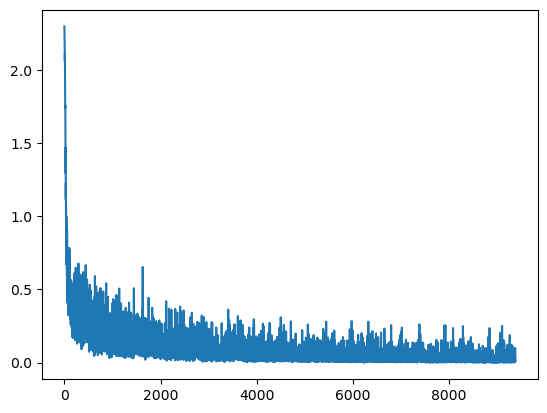

In [10]:
%matplotlib inline
plt.plot(losses)
plt.show()

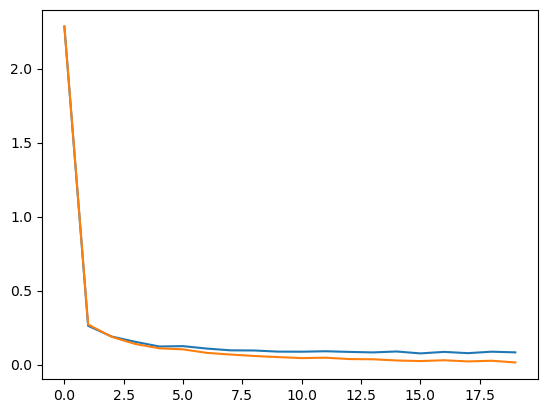

In [11]:
plt.plot(test_losses)
plt.plot(train_losses)
plt.show()

In [12]:
# finding test loss
output = model(train_X)
loss = criterion(output, train_y)
print(loss.item())

0.021082919090986252


In [13]:
hessian_comp = hessian(model, criterion, data=(train_X, train_y), cuda=False)

d:\miniconda3\envs\deephessian\Lib\site-packages\torch\autograd\graph.py:744: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at C:\b\abs_fakvb73nko\croot\pytorch-select_1730848725921\work\torch\csrc\autograd\engine.cpp:1208.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [14]:
trace = hessian_comp.trace()
print("The trace of this model is: %.4f"%(np.mean(trace)))

The trace of this model is: 22.4618


In [ ]:
# top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=20)
# print("The top two eigenvalues of this model are: ", top_eigenvalues)

The top two eigenvalues of this model are:  [1.608893871307373, 1.2666716575622559, 1.101566195487976, 0.9621520638465881, 0.7985818982124329, 0.7562527656555176, 0.5832130908966064, 0.43961480259895325, 0.49059900641441345, 0.4274073541164398, 0.34394925832748413, 0.3396146595478058, 0.28575974702835083, 0.3115382790565491, 0.27783316373825073, 0.2528150677680969, 0.2573324739933014, 0.25158432126045227, 0.23695391416549683, 0.22765429317951202]


Obtained eigendensities and eigenweights in 0.02 seconds


c:\Users\Rajeev Wankar\Desktop\Aarsh IITGN\Project Course - Sem 4\DeepHessian\PyHessian\density_plot.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  density_output[i, j] = np.sum(tmp_result * weights[i, :])


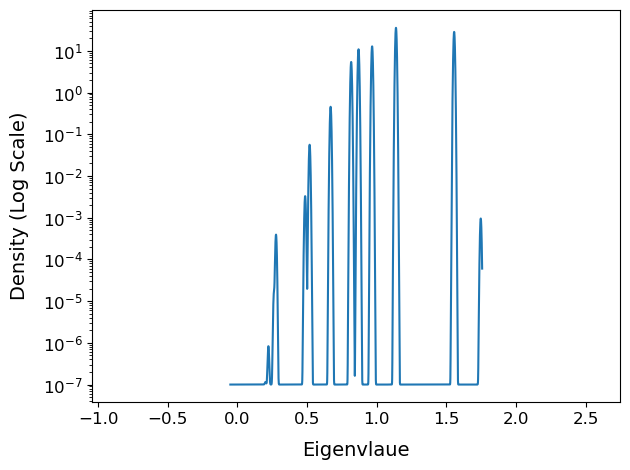

In [ ]:
t0 = time.time()
density_eigen, density_weight = hessian_comp.density()
print("Obtained eigendensities and eigenweights in %.2f seconds"%(time.time()-t0))
get_esd_plot(density_eigen, density_weight)